In [11]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.svm import SVC

In [12]:
import warnings 
warnings.filterwarnings("ignore")

In [13]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
model = SVC() 

In [17]:
gscv = GridSearchCV(model,{"gamma":["auto","scale"],"C":[1,5,10,20],
                          "kernel":["linear","poly","rbf","sigmoid"]},
                   cv=5, return_train_score=True) #default cv is kfold

In [18]:
gscv.fit(iris.data,iris.target) 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True)

In [19]:
gs_data = gscv.cv_results_

In [20]:
data = pd.DataFrame(gs_data)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000000,0.000000,0.007333,0.004460,1,auto,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.966667,1.000000,...,0.980000,0.016330,2,0.975000,0.975000,0.991667,0.983333,0.983333,0.981667,0.006236
1,0.003529,0.003257,0.000000,0.000000,1,auto,poly,"{'C': 1, 'gamma': 'auto', 'kernel': 'poly'}",1.000000,1.000000,...,0.966667,0.042164,15,0.975000,0.975000,0.991667,1.000000,0.975000,0.983333,0.010541
2,0.000000,0.000000,0.004439,0.005779,1,auto,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.966667,1.000000,...,0.980000,0.016330,2,0.983333,0.983333,0.991667,0.983333,0.975000,0.983333,0.005270
3,0.001607,0.003215,0.003125,0.006250,1,auto,sigmoid,"{'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}",0.333333,0.100000,...,0.093333,0.125433,25,0.333333,0.016667,0.050000,0.041667,0.050000,0.098333,0.118134
4,0.000000,0.000000,0.000000,0.000000,1,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.966667,1.000000,...,0.980000,0.016330,2,0.975000,0.975000,0.991667,0.983333,0.983333,0.981667,0.006236
5,0.001601,0.003201,0.000050,0.000100,1,scale,poly,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}",0.966667,1.000000,...,0.980000,0.016330,2,0.975000,0.975000,0.983333,0.991667,0.966667,0.978333,0.008498
6,0.002792,0.005584,0.000000,0.000000,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.966667,0.966667,...,0.966667,0.021082,15,0.983333,0.958333,0.983333,0.983333,0.958333,0.973333,0.012247
7,0.005899,0.003184,0.001599,0.003198,1,scale,sigmoid,"{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.033333,0.166667,...,0.066667,0.059628,29,0.041667,0.066667,0.091667,0.066667,0.083333,0.070000,0.017159
8,0.001600,0.003199,0.003878,0.004871,5,auto,linear,"{'C': 5, 'gamma': 'auto', 'kernel': 'linear'}",1.000000,1.000000,...,0.980000,0.026667,2,0.975000,0.966667,0.991667,0.991667,0.966667,0.978333,0.011304
9,0.004202,0.003554,0.004799,0.003918,5,auto,poly,"{'C': 5, 'gamma': 'auto', 'kernel': 'poly'}",1.000000,1.000000,...,0.966667,0.042164,15,0.983333,0.983333,0.991667,1.000000,0.983333,0.988333,0.006667


In [21]:
data.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000000,0.000000,0.007333,0.004460,1,auto,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.966667,1.0,...,0.980000,0.016330,2,0.975000,0.975000,0.991667,0.983333,0.983333,0.981667,0.006236
1,0.003529,0.003257,0.000000,0.000000,1,auto,poly,"{'C': 1, 'gamma': 'auto', 'kernel': 'poly'}",1.000000,1.0,...,0.966667,0.042164,15,0.975000,0.975000,0.991667,1.000000,0.975000,0.983333,0.010541
2,0.000000,0.000000,0.004439,0.005779,1,auto,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.966667,1.0,...,0.980000,0.016330,2,0.983333,0.983333,0.991667,0.983333,0.975000,0.983333,0.005270
3,0.001607,0.003215,0.003125,0.006250,1,auto,sigmoid,"{'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}",0.333333,0.1,...,0.093333,0.125433,25,0.333333,0.016667,0.050000,0.041667,0.050000,0.098333,0.118134
4,0.000000,0.000000,0.000000,0.000000,1,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.966667,1.0,...,0.980000,0.016330,2,0.975000,0.975000,0.991667,0.983333,0.983333,0.981667,0.006236


In [22]:
data.tail(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
27,0.000000,0.000000,0.003287,0.004028,20,auto,sigmoid,"{'C': 20, 'gamma': 'auto', 'kernel': 'sigmoid'}",0.333333,0.100000,...,0.093333,0.125433,25,0.333333,0.016667,0.050000,0.041667,0.050000,0.098333,0.118134
28,0.000825,0.001650,0.003125,0.006251,20,scale,linear,"{'C': 20, 'gamma': 'scale', 'kernel': 'linear'}",1.000000,1.000000,...,0.966667,0.042164,15,0.975000,0.966667,0.991667,1.000000,0.975000,0.981667,0.012247
29,0.002039,0.003102,0.003543,0.003708,20,scale,poly,"{'C': 20, 'gamma': 'scale', 'kernel': 'poly'}",1.000000,1.000000,...,0.966667,0.042164,15,0.975000,0.975000,0.991667,1.000000,0.975000,0.983333,0.010541
30,0.003635,0.004508,0.000920,0.001840,20,scale,rbf,"{'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}",0.966667,1.000000,...,0.980000,0.016330,2,0.975000,0.975000,0.991667,0.991667,0.966667,0.980000,0.010000
31,0.001368,0.002735,0.001600,0.003200,20,scale,sigmoid,"{'C': 20, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.033333,0.133333,...,0.040000,0.048990,32,0.041667,0.033333,0.041667,0.033333,0.041667,0.038333,0.004082


In [23]:
gscv.best_params_        #used to find parameter

{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}

In [24]:
gscv.best_score_

np.float64(0.9866666666666667)

In [25]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [1]:
model_params = {"svm":{"model":SVC(gamma="auto"),"params":{"C":[1,10,20],"kernel":["rbf","linear"],}},
               "random_forest":{"model":RandomForestClassifier(),"params":{"n_estimators":[1,5,10]}},
               "logistic_regression":{"model":LogisticRegression(),"params":{"C":[1,5,20]}}}

NameError: name 'SVC' is not defined

In [31]:
model_params

{'svm': {'model': SVC(gamma='auto'),
  'params': {'C': [1, 10, 20], 'kernel': ['rbf', 'linear']}},
 'random_forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [1, 5, 10]}},
 'logistic_regression': {'model': LogisticRegression(),
  'params': {'C': [1, 5, 20]}}}

In [32]:
from sklearn.model_selection import GridSearchCV
scores = []
models = ["svm","random_forest","logistic_regression"]
for model_name in models:
    mp = model_params[model_name] 
    gds = GridSearchCV(mp["model"],mp["params"],cv=5,return_train_score=True)
    gds.fit(iris.data,iris.target)
    scores.append({"model":model_name, "best_score":gds.best_score_,"best_params":gds.best_params_})

In [33]:
scores

[{'model': 'svm',
  'best_score': np.float64(0.9800000000000001),
  'best_params': {'C': 1, 'kernel': 'rbf'}},
 {'model': 'random_forest',
  'best_score': np.float64(0.9666666666666668),
  'best_params': {'n_estimators': 5}},
 {'model': 'logistic_regression',
  'best_score': np.float64(0.9733333333333334),
  'best_params': {'C': 1}}]

In [34]:
df = pd.DataFrame(scores)
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.966667,{'n_estimators': 5}
2,logistic_regression,0.973333,{'C': 1}


### K-FOLD

In [35]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [36]:
data = pd.read_excel("Obesity dataset.xlsx")
data

,Gender,Age,Height,Weight,OFM,HCFC,MIV,NMPD,FBM,SMOKE,WCIL,MCC,PAIW,CALC,MOT,BMI
0,Female,21,1.62,64.00,yes,no,2,3,Sometimes,no,2,no,0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3,3,Sometimes,yes,3,yes,3,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2,3,Sometimes,no,2,no,2,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3,3,Sometimes,no,2,no,2,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2,1,Sometimes,no,2,no,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3,3,Sometimes,no,2,no,2,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3,3,Sometimes,no,2,no,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3,3,Sometimes,no,2,no,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3,3,Sometimes,no,3,no,1,Sometimes,Public_Transportation,Obesity_Type_III


In [39]:
data.to_csv("Obesity dataset.xlsx",index=False)
data = pd.read_csv("Obesity dataset.xlsx")

In [40]:
data

,Gender,Age,Height,Weight,OFM,HCFC,MIV,NMPD,FBM,SMOKE,WCIL,MCC,PAIW,CALC,MOT,BMI
0,Female,21,1.62,64.00,yes,no,2,3,Sometimes,no,2,no,0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3,3,Sometimes,yes,3,yes,3,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2,3,Sometimes,no,2,no,2,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3,3,Sometimes,no,2,no,2,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2,1,Sometimes,no,2,no,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3,3,Sometimes,no,2,no,2,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3,3,Sometimes,no,2,no,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3,3,Sometimes,no,2,no,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3,3,Sometimes,no,3,no,1,Sometimes,Public_Transportation,Obesity_Type_III


In [41]:
data.isna().sum()

Gender    0
Age       0
Height    0
Weight    0
OFM       0
HCFC      0
MIV       0
NMPD      0
FBM       0
SMOKE     0
WCIL      0
MCC       0
PAIW      0
CALC      0
MOT       0
BMI       0
dtype: int64

In [42]:
data.dtypes

Gender     object
Age         int64
Height    float64
Weight    float64
OFM        object
HCFC       object
MIV         int64
NMPD        int64
FBM        object
SMOKE      object
WCIL        int64
MCC        object
PAIW        int64
CALC       object
MOT        object
BMI        object
dtype: object

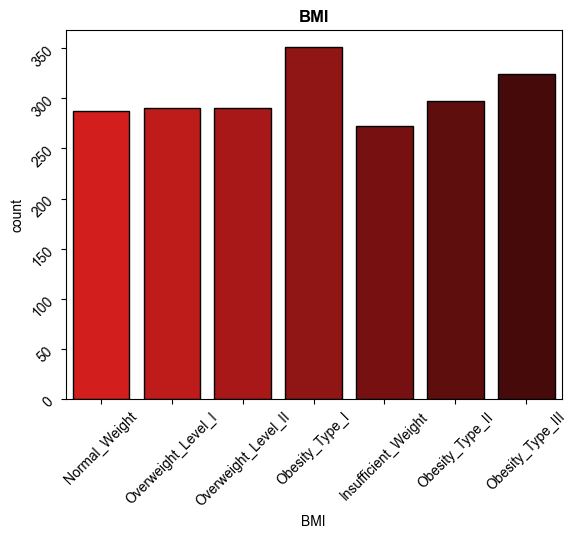

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
sns.countplot(x="BMI",data=data,palette="flag",edgecolor="black")
plt.title("BMI",weight="bold")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
sns.set(font_scale=1)
plt.show()

In [50]:
data.dtypes

Gender     object
Age         int64
Height    float64
Weight    float64
OFM        object
HCFC       object
MIV         int64
NMPD        int64
FBM        object
SMOKE      object
WCIL        int64
MCC        object
PAIW        int64
CALC       object
MOT        object
BMI        object
dtype: object

In [51]:
data

,Gender,Age,Height,Weight,OFM,HCFC,MIV,NMPD,FBM,SMOKE,WCIL,MCC,PAIW,CALC,MOT,BMI
0,Female,21,1.62,64.00,yes,no,2,3,Sometimes,no,2,no,0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3,3,Sometimes,yes,3,yes,3,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2,3,Sometimes,no,2,no,2,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3,3,Sometimes,no,2,no,2,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2,1,Sometimes,no,2,no,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3,3,Sometimes,no,2,no,2,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3,3,Sometimes,no,2,no,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3,3,Sometimes,no,2,no,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3,3,Sometimes,no,3,no,1,Sometimes,Public_Transportation,Obesity_Type_III


In [52]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le = LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])
data["OFM"]=le.fit_transform(data["OFM"])
data["HCFC"]=le.fit_transform(data["HCFC"])
data["FBM"]=le.fit_transform(data["FBM"])
data["SMOKE"]=le.fit_transform(data["SMOKE"])
data["MCC"]=le.fit_transform(data["MCC"])
data["CALC"]=le.fit_transform(data["CALC"])
data["MOT"]=le.fit_transform(data["MOT"])
data["BMI"]=le.fit_transform(data["BMI"])
data

,Gender,Age,Height,Weight,OFM,HCFC,MIV,NMPD,FBM,SMOKE,WCIL,MCC,PAIW,CALC,MOT,BMI
0,0,21,1.62,64.00,1,0,2,3,2,0,2,0,0,3,3,1
1,0,21,1.52,56.00,1,0,3,3,2,1,3,1,3,2,3,1
2,1,23,1.80,77.00,1,0,2,3,2,0,2,0,2,1,3,1
3,1,27,1.80,87.00,0,0,3,3,2,0,2,0,2,1,4,5
4,1,22,1.78,89.80,0,0,2,1,2,0,2,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,1,3,3,2,0,2,0,2,2,3,4
2107,0,22,1.75,133.74,1,1,3,3,2,0,2,0,1,2,3,4
2108,0,23,1.75,133.69,1,1,3,3,2,0,2,0,1,2,3,4
2109,0,24,1.74,133.35,1,1,3,3,2,0,3,0,1,2,3,4


In [55]:
data.dtypes

Gender      int64
Age         int64
Height    float64
Weight    float64
OFM         int64
HCFC        int64
MIV         int64
NMPD        int64
FBM         int64
SMOKE       int64
WCIL        int64
MCC         int64
PAIW        int64
CALC        int64
MOT         int64
BMI         int64
dtype: object

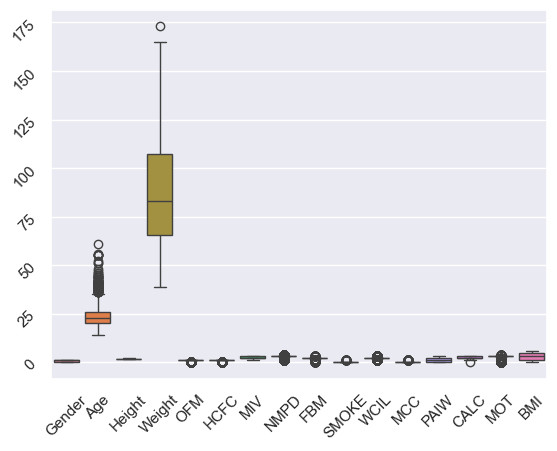

In [57]:
sns.boxplot(data)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
sns.set(font_scale=1)
plt.show()

In [58]:
data.size

33776

In [60]:
from sklearn.model_selection import KFold,StratifiedKFold
fold = StratifiedKFold(n_splits=5)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [62]:
model = RandomForestClassifier(n_estimators=25,random_state=34)

In [63]:
x = data.drop(["BMI"],axis=1)
y = data["BMI"]

In [66]:
x

,Gender,Age,Height,Weight,OFM,HCFC,MIV,NMPD,FBM,SMOKE,WCIL,MCC,PAIW,CALC,MOT
0,0,21,1.62,64.00,1,0,2,3,2,0,2,0,0,3,3
1,0,21,1.52,56.00,1,0,3,3,2,1,3,1,3,2,3
2,1,23,1.80,77.00,1,0,2,3,2,0,2,0,2,1,3
3,1,27,1.80,87.00,0,0,3,3,2,0,2,0,2,1,4
4,1,22,1.78,89.80,0,0,2,1,2,0,2,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,1,3,3,2,0,2,0,2,2,3
2107,0,22,1.75,133.74,1,1,3,3,2,0,2,0,1,2,3
2108,0,23,1.75,133.69,1,1,3,3,2,0,2,0,1,2,3
2109,0,24,1.74,133.35,1,1,3,3,2,0,3,0,1,2,3


In [67]:
y

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: BMI, Length: 2111, dtype: int64

In [68]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [73]:
rf_score=[]

In [ ]:
for train_index,test_index in fold.split(x,y):
    x_train,x_test,y_train,y_test = x.loc[train_index],x.loc[test_index],y.loc[train,index],y.loc[test_index]
    rf_score.append
    